In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("..")
from config import *

In [2]:
T_initial = 25

In [3]:
start = 0
end = 501  
number_range = range(start, end)
k_l=list(number_range)
a=0.2
b=-0.0002
n=50
w_f= 0.0628
Delta_noise = 1
n_noise= 5
w_noise= 0.209
Del_T_mod =5
Del_T_noise =1
F_l=[]

In [4]:
for k in k_l:
    for n in  range(1, 50):
        F_mod = T_initial + a*k + b*k**2 + Del_T_mod *(math.sin(2*math.pi/n)+w_f )
        F_noise = Del_T_noise*(math.sin(2*math.pi/n_noise)+w_noise )
        F = F_mod + F_noise
    
    F_l.append(F)

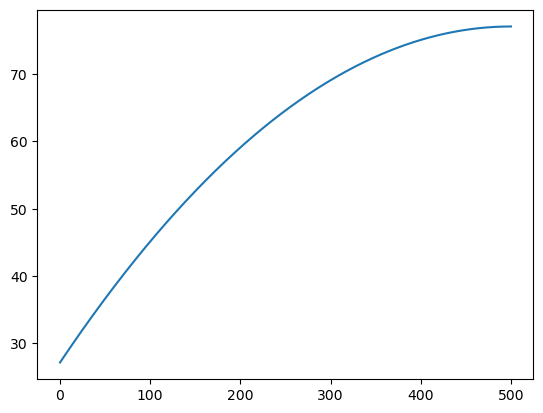

In [5]:
plt.plot(k_l, F_l)
plt.show()

In [6]:
loaded_node_temp= pd.read_pickle(Dict_temp_0_182)
loaded_nodes_loc=pd.read_pickle(Nodes_loc_0_182)
df= pd.read_csv(result_df)
#df.head()

In [9]:
def objective(params, n, k, F_obs, T_initial):
    a, b, Del_T_mod, w_f, Del_T_noise, w_noise = params

    F_mod = [T_initial + a*t + b*t**2 + Del_T_mod*(math.sin(2*math.pi/n) + w_f) for t in k]
    F_noise = [Del_T_noise*(math.sin(2*math.pi/n_noise) + w_noise) for _ in k]
    F = [F_mod[i] + F_noise[i] for i in range(len(k))]

    error = [F[i] - F_obs[i] for i in range(len(k))]
    return sum([err**2 for err in error])


In [10]:
from scipy.optimize import minimize
temperature =[]
# Using a loop
for key in loaded_node_temp:
    if len(loaded_node_temp[key]) >= 3:  # Make sure the list has at least 2 elements
        temperature .append(loaded_node_temp[key][2])

time = list(loaded_node_temp.keys())
n = 50
k = time
F_obs = temperature
T_initial = 24

# Initial guess for parameters (excluding T_initial)
initial_params = [1, 1,1, 1, 1, 1]

# Perform optimization
result = minimize(objective, initial_params, args=(n, k, F_obs, T_initial))
optimized_params = result.x

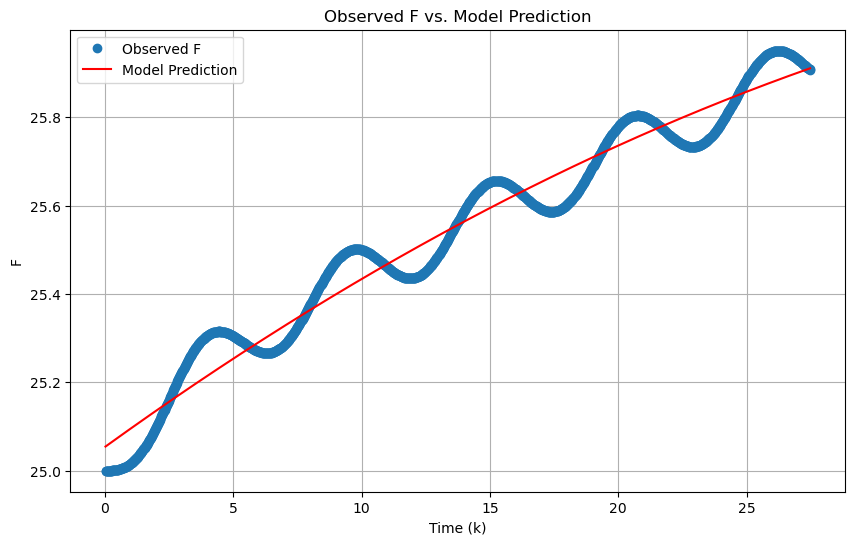

In [14]:
def calculate_model_predictions(k, T_initial, a, b, Del_T_mod, w_f, Del_T_noise, w_noise):
    F_mod = [T_initial + a*t + b*t**2 + Del_T_mod*(np.sin(2*np.pi/n) + w_f) for t in k]
    F_noise = [Del_T_noise*(np.sin(2*np.pi/n_noise) + w_noise) for _ in k]
    return [F_mod[i] + F_noise[i] for i in range(len(k))]


# Calculate model predictions using optimized parameters
a_opt, b_opt, Del_T_mod_opt, w_f_opt, Del_T_noise_opt, w_noise_opt = optimized_params
F_model = calculate_model_predictions(k, T_initial, a_opt, b_opt, Del_T_mod_opt, w_f_opt, Del_T_noise_opt, w_noise_opt)

# Create a time series plot
plt.figure(figsize=(10, 6))
plt.plot(k, F_obs, label='Observed F', marker='o', linestyle='None')
plt.plot(k, F_model, label='Model Prediction', linestyle='-', color='red')
plt.xlabel('Time (k)')
plt.ylabel('F')
plt.title('Observed F vs. Model Prediction')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
import numpy as np
import math
from scipy.optimize import curve_fit



# Define the model function
def model_function(k, a, b, Del_T_mod, w_f, Del_T_noise, w_noise):
    F_mod = T_initial + a*k + b*k**2 + Del_T_mod*(np.sin(2*np.pi/n) + w_f)
    F_noise = Del_T_noise*(np.sin(2*np.pi/n) + w_noise)
    return F_mod + F_noise

# Initial guess for parameters
initial_params = [1, 1, 1, 1, 1, 1]

# Perform least-squares fitting using curve_fit
optimized_params, _ = curve_fit(model_function, time, temperature, p0=initial_params)


print("Optimized Parameters:", optimized_params)


Optimized Parameters: [ 4.18825620e-02 -3.89322377e-04  1.72282972e+00  1.53141029e-01
  6.85117073e-01  7.12700827e-01]


In [17]:
def model_function(k, a, b, Del_T_mod, w_f, Del_T_noise, w_noise):
    predictions = []
    for t in k:
        F_mod = T_initial + a*t + b*t**2 + Del_T_mod*(np.sin(2*np.pi/n) + w_f)
        F_noise = Del_T_noise*(np.sin(2*np.pi/n) + w_noise)
        F = F_mod + F_noise
        predictions.append(F)
    return predictions
predictions = model_function(time, *optimized_params)

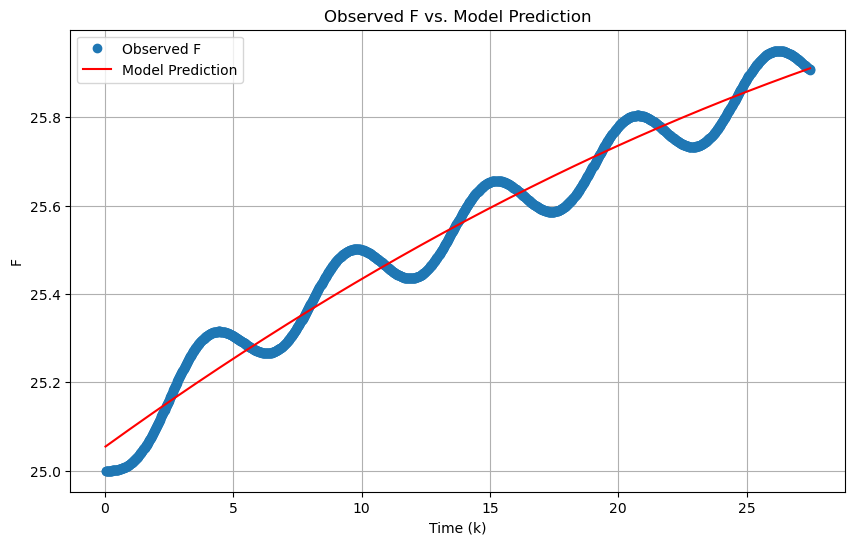

In [18]:
# Create a time series plot
plt.figure(figsize=(10, 6))
plt.plot(k, F_obs, label='Observed F', marker='o', linestyle='None')
plt.plot(k, predictions, label='Model Prediction', linestyle='-', color='red')
plt.xlabel('Time (k)')
plt.ylabel('F')
plt.title('Observed F vs. Model Prediction')
plt.legend()
plt.grid(True)
plt.show()